<a href="https://colab.research.google.com/github/LawanMercy/Mobile_Data_Usage_Analysis/blob/main/Mobile_Data_Usage_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Necessary Libraries and Loading the datase**





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset

file_path = "/content/mobile_usage_ng.xlsx"
dataset = pd.read_excel(file_path)


In [ ]:
# Displaying whats in the dataset

# Display first few rows
dataset.head()

,user_id,state,age,monthly_data_mb,app_downloads,spending_ngn
0,USER0001,OYO,21.0,13773,18,19690.0
1,USER0002,Anambra,34.0,11230,11,NaN
2,USER0003,Oyo,29.0,22768,36,32221.0
3,USER0004,Lagos,25.0,15322,41,14204.0
4,USER0005,Oyo,22.0,23769,16,2623.0


In [ ]:
print(dataset)

       user_id     state   age  monthly_data_mb  app_downloads  spending_ngn
0     USER0001       OYO  21.0            13773             18       19690.0
1     USER0002  Anambra   34.0            11230             11           NaN
2     USER0003      Oyo   29.0            22768             36       32221.0
3     USER0004    Lagos   25.0            15322             41       14204.0
4     USER0005      Oyo   22.0            23769             16        2623.0
...        ...       ...   ...              ...            ...           ...
1995  USER1996     lagos  18.0             9921             21        4166.0
1996  USER1997    KADUNA  21.0             5932              0       37545.0
1997  USER1998     Enugu  15.0            12920             19       21286.0
1998  USER1999   Kaduna   26.0            16311             21        6015.0
1999  USER2000      kano  27.0             7222             47           NaN

[2000 rows x 6 columns]


**Checking and Handling Missing Data**

In [ ]:
# Checking for missing data

dataset.isnull().sum()

,0
user_id,0
state,0
age,103
monthly_data_mb,0
app_downloads,0
spending_ngn,104


In [ ]:
# Filling the missing data for age and spending_ngn with median

dataset['age'].fillna(dataset['age'].median(), inplace=True)
dataset['spending_ngn'].fillna(dataset['spending_ngn'].median(), inplace=True)

In [ ]:
# Checking for missing data again after fill with median

dataset.isnull().sum()

,0
user_id,0
state,0
age,0
monthly_data_mb,0
app_downloads,0
spending_ngn,0


**Standardizing State Names**

In [ ]:
# Standardizing all the state names (e.g., 'lagos' to 'Lagos', 'oyo' to 'Oyo') and removing trailing spaces
dataset['state'] = dataset['state'].str.title().str.strip()
dataset['state'].unique()

array(['Oyo', 'Anambra', 'Lagos', 'Kano', 'Kaduna', 'Enugu'], dtype=object)

**Ensuring the numerical value types are correct**

In [ ]:
# Ensure age, monthly_data_mb, and spending_ngn are numeric (float/int)

dataset['age'] = pd.to_numeric(dataset['age'].astype(int), errors='coerce')
dataset['monthly_data_mb'] = pd.to_numeric(dataset['monthly_data_mb'].astype(float), errors='coerce')
dataset['spending_ngn'] = pd.to_numeric(dataset['spending_ngn'].astype(int), errors='coerce')
dataset.dtypes


,0
user_id,object
state,object
age,int64
monthly_data_mb,float64
app_downloads,int64
spending_ngn,int64


**Checking for duplicates**

In [ ]:
# checking for possible duplicates

dataset.duplicated().sum()

np.int64(0)

In [ ]:
# displaying the cleaned dataset

dataset.head(5)

,user_id,state,age,monthly_data_mb,app_downloads,spending_ngn
0,USER0001,Oyo,21,13773.0,18,19690
1,USER0002,Anambra,34,11230.0,11,25402
2,USER0003,Oyo,29,22768.0,36,32221
3,USER0004,Lagos,25,15322.0,41,14204
4,USER0005,Oyo,22,23769.0,16,2623


In [ ]:
# Saving the cleaned dataset

dataset.to_excel('cleaned_mobile_usage_ng.xlsx', index=False)


**Step 2: Identifying and Treating Outliers**

In [ ]:
# Using Z-Score method: flag values with |z-score| >3 to Identify outliers in age and spending_ngn

from scipy import stats
z_scores = np.abs(stats.zscore(dataset['age']))
dataset['age_outlier'] = (z_scores > 3).astype(int)
z_scores = np.abs(stats.zscore(dataset['spending_ngn']))
dataset['spending_ngn_outlier'] = (z_scores > 3).astype(int)
dataset.head(10)

,user_id,state,age,monthly_data_mb,app_downloads,spending_ngn,age_outlier,spending_ngn_outlier
0,USER0001,Oyo,21,13773.0,18,19690,0,0
1,USER0002,Anambra,34,11230.0,11,25402,0,0
2,USER0003,Oyo,29,22768.0,36,32221,0,0
3,USER0004,Lagos,25,15322.0,41,14204,0,0
4,USER0005,Oyo,22,23769.0,16,2623,0,0
5,USER0006,Anambra,35,1400.0,36,25674,0,0
6,USER0007,Oyo,21,23353.0,47,44801,0,0
7,USER0008,Kano,33,9535.0,999,25402,0,0
8,USER0009,Kaduna,25,28652.0,27,47716,0,0
9,USER0010,Lagos,25,19581.0,999,15086,0,0


In [ ]:
# Filter the dataset to show rows with outliers in either age or spending_ngn
outlier_rows = dataset[(dataset['age_outlier'] == 1) | (dataset['spending_ngn_outlier'] == 1)]

# Print the first 10 rows with outliers
print("First 10 rows with outliers:")
print(outlier_rows.head(10))

First 10 rows with outliers:
      user_id  state  age  monthly_data_mb  app_downloads  spending_ngn  \
21   USER0022  Kano    26          29630.0             17       1000000   
42   USER0043  Lagos   23          17114.0              7       1000000   
53   USER0054  Enugu   31          26222.0             39       1000000   
78   USER0079   Kano   35          17725.0              2       1000000   
117  USER0118   Kano   17           5349.0             35       1000000   
176  USER0177  Enugu   31          11123.0             46       1000000   
286  USER0287   Kano  999           7254.0              8         13710   
292  USER0293    Oyo  999           3950.0             27         41986   
399  USER0400   Kano   33            492.0             14       1000000   
437  USER0438   Kano   33           3556.0              3       1000000   

     age_outlier  spending_ngn_outlier  
21             0                     1  
42             0                     1  
53             0      

In [ ]:
# Using IQR Method: Flag values outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR] to Identify outliers in age and spending_ngn

Q1 = dataset['age'].quantile(0.25)
Q3 = dataset['age'].quantile(0.75)
IQR = Q3 - Q1
dataset['age_outlier'] = ((dataset['age'] < (Q1 - 1.5 * IQR)) | (dataset['age'] > (Q3 + 1.5 * IQR))).astype(int)

Q1 = dataset['spending_ngn'].quantile(0.25)
Q3 = dataset['spending_ngn'].quantile(0.75)
IQR = Q3 - Q1
dataset['spending_ngn_outlier'] = ((dataset['spending_ngn'] < (Q1 - 1.5 * IQR)) | (dataset['spending_ngn'] > (Q3 + 1.5 * IQR))).astype(int)

dataset.head(10)

,user_id,state,age,monthly_data_mb,app_downloads,spending_ngn,age_outlier,spending_ngn_outlier,z_outlier
0,USER0001,Oyo,21,13773.0,18,19690,0,0,False
1,USER0002,Anambra,34,11230.0,11,25402,0,0,False
2,USER0003,Oyo,29,22768.0,36,32221,0,0,False
3,USER0004,Lagos,25,15322.0,41,14204,0,0,False
4,USER0005,Oyo,22,23769.0,16,2623,0,0,False
5,USER0006,Anambra,35,1400.0,36,25674,0,0,False
6,USER0007,Oyo,21,23353.0,47,44801,0,0,False
7,USER0008,Kano,33,9535.0,999,25402,0,0,False
8,USER0009,Kaduna,25,28652.0,27,47716,0,0,False
9,USER0010,Lagos,25,19581.0,999,15086,0,0,False


In [ ]:
# Using Threshold Method to Identify outliers in age and spending_ngn

age_threshold = 100
dataset['age_outlier'] = (dataset['age'] > age_threshold).astype(int)

spending_ngn_threshold = 1000000
dataset['spending_ngn_outlier'] = (dataset['spending_ngn'] > spending_ngn_threshold).astype(int)

dataset.head(10)

,user_id,state,age,monthly_data_mb,app_downloads,spending_ngn,age_outlier,spending_ngn_outlier,z_outlier
0,USER0001,Oyo,21,13773.0,18,19690,0,0,False
1,USER0002,Anambra,34,11230.0,11,25402,0,0,False
2,USER0003,Oyo,29,22768.0,36,32221,0,0,False
3,USER0004,Lagos,25,15322.0,41,14204,0,0,False
4,USER0005,Oyo,22,23769.0,16,2623,0,0,False
5,USER0006,Anambra,35,1400.0,36,25674,0,0,False
6,USER0007,Oyo,21,23353.0,47,44801,0,0,False
7,USER0008,Kano,33,9535.0,999,25402,0,0,False
8,USER0009,Kaduna,25,28652.0,27,47716,0,0,False
9,USER0010,Lagos,25,19581.0,999,15086,0,0,False


**Data Transformation**

In [ ]:
# Normalize spending_ngn to [0, 1] and explain why it’s suitable

min_spending = dataset['spending_ngn'].min()
max_spending = dataset['spending_ngn'].max()
dataset['spending_ngn_normalized'] = (dataset['spending_ngn'] - min_spending) / (max_spending - min_spending)
print(dataset[['spending_ngn', 'spending_ngn_normalized']])


      spending_ngn  spending_ngn_normalized
0          19690.0                 0.019184
1          25402.0                 0.024899
2          32221.0                 0.031721
3          14204.0                 0.013695
4           2623.0                 0.002108
...            ...                      ...
1995        4166.0                 0.003652
1996       37545.0                 0.037048
1997       21286.0                 0.020781
1998        6015.0                 0.005502
1999       25402.0                 0.024899

[2000 rows x 2 columns]


In [ ]:
# Standardize monthly_data_mb using StandardScaler or manual calculation (mean=0, std=1).

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset['monthly_data_mb_standardized'] = scaler.fit_transform(dataset[['monthly_data_mb']])
print(dataset[['monthly_data_mb', 'monthly_data_mb_standardized']])


      monthly_data_mb  monthly_data_mb_standardized
0               13773                     -0.159878
1               11230                     -0.177452
2               22768                     -0.097717
3               15322                     -0.149174
4               23769                     -0.090800
...               ...                           ...
1995             9921                     -0.186498
1996             5932                     -0.214065
1997            12920                     -0.165773
1998            16311                     -0.142339
1999             7222                     -0.205150

[2000 rows x 2 columns]


In [ ]:
# Discuss whether age should be transformed, considering its narrow range (15–35, excluding outliers) and Nigerian context.


In [ ]:
# Show transformed columns (first 5 rows) and verify normalization (min=0, max=1) and standardization (mean~0, std~1).

# Normalized check
print(dataset[['spending_ngn', 'spending_ngn_normalized']].head())
print("\nVerification of normalization for spending_ngn:")
print("Min:", dataset['spending_ngn_normalized'].min())
print("Max:", dataset['spending_ngn_normalized'].max())


# Standardized check
print(dataset[['monthly_data_mb', 'monthly_data_mb_standardized']].head())
print("\nVerification of standardization for monthly_data_mb:")
print("Mean:", dataset['monthly_data_mb_standardized'].mean())
print("Standard Deviation:", dataset['monthly_data_mb_standardized'].std())

   spending_ngn  spending_ngn_normalized
0         19690                 0.019184
1         25402                 0.024899
2         32221                 0.031721
3         14204                 0.013695
4          2623                 0.002108

Verification of normalization for spending_ngn:
Min: 0.0
Max: 1.0
   monthly_data_mb  monthly_data_mb_standardized
0          13773.0                     -0.159878
1          11230.0                     -0.177452
2          22768.0                     -0.097717
3          15322.0                     -0.149174
4          23769.0                     -0.090800

Verification of standardization for monthly_data_mb:
Mean: 7.993605777301126e-18
Standard Deviation: 1.00025009378908


**Visualization**

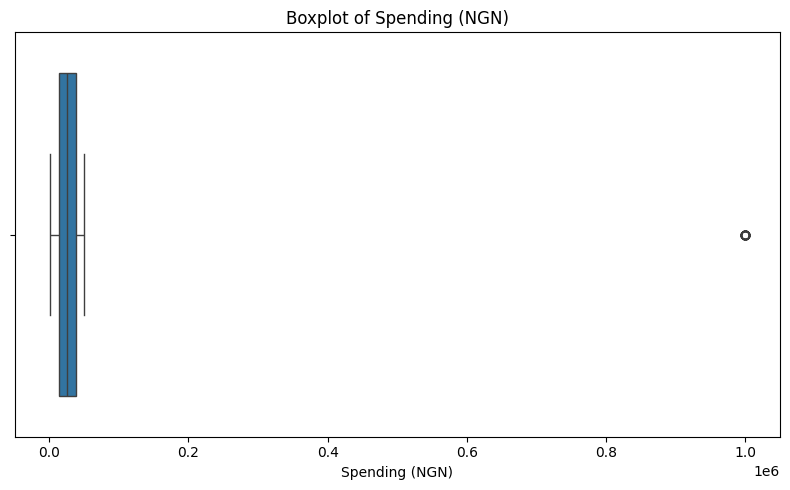

In [ ]:
# Boxplot: spending_ngn

plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset['spending_ngn'])
plt.title("Boxplot of Spending (NGN)")
plt.xlabel("Spending (NGN)")
plt.tight_layout()
plt.savefig("boxplot_spending_ngn.png")
plt.show()

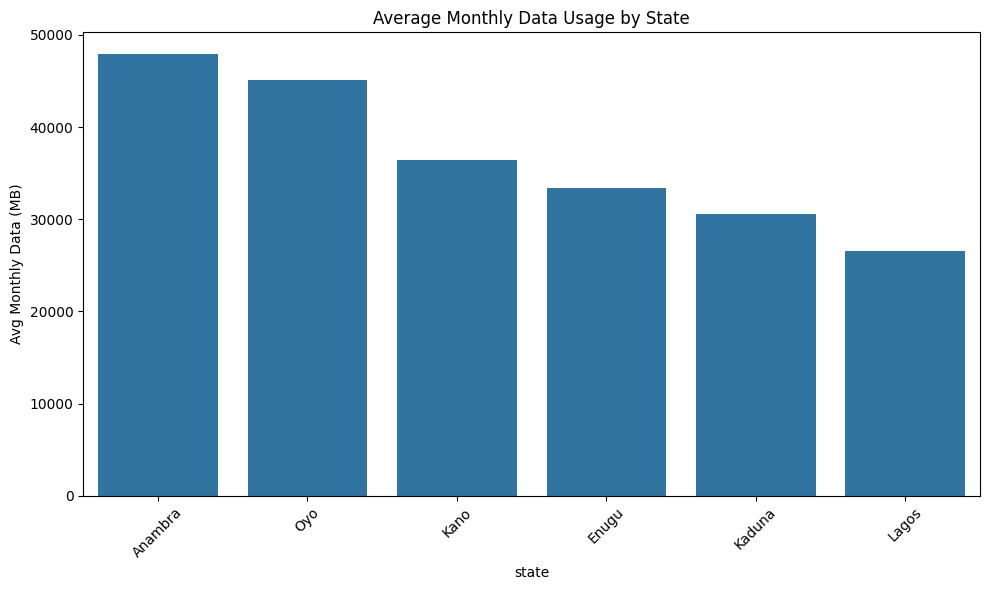

In [ ]:
# Bar chart: Avg monthly_data_mb by state

plt.figure(figsize=(10, 6))
avg_data = dataset.groupby("state")["monthly_data_mb"].mean().sort_values(ascending=False)
sns.barplot(x=avg_data.index, y=avg_data.values)
plt.title("Average Monthly Data Usage by State")
plt.ylabel("Avg Monthly Data (MB)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("avg_data_by_state.png")
plt.show()

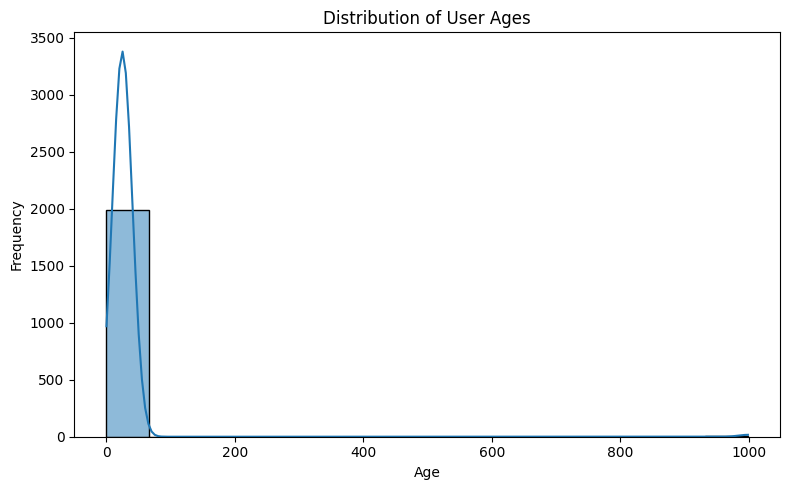

In [ ]:
# Histogram of age distribution

plt.figure(figsize=(8, 5))
sns.histplot(dataset['age'], bins=15, kde=True)
plt.title("Distribution of User Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("age_distribution.png")
plt.show()

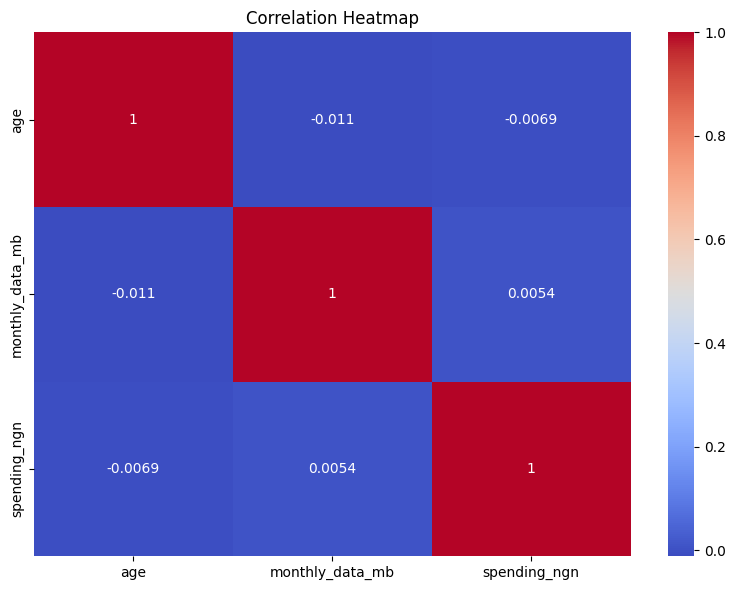

In [ ]:
# Heatmap of correlations

plt.figure(figsize=(8, 6))
sns.heatmap(dataset[['age', 'monthly_data_mb', 'spending_ngn']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

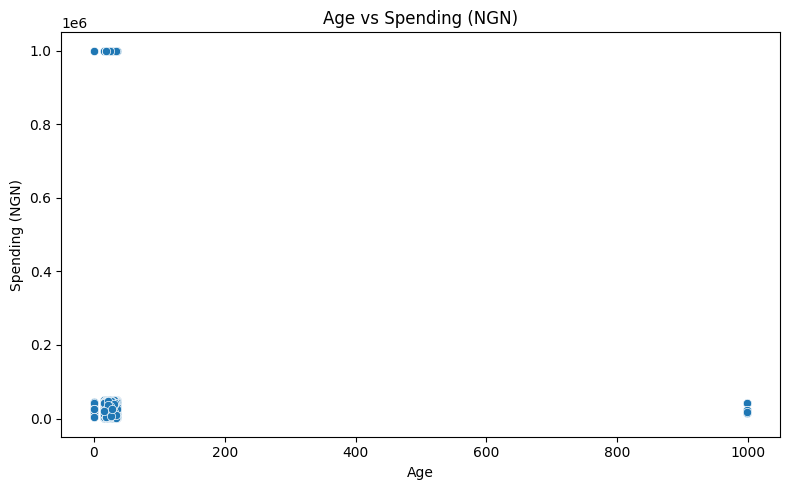

In [ ]:
# Scatter Plot: age vs. spending

plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='spending_ngn', data=dataset)
plt.title("Age vs Spending (NGN)")
plt.xlabel("Age")
plt.ylabel("Spending (NGN)")
plt.tight_layout()
plt.savefig("age_vs_spending.png")
plt.show()

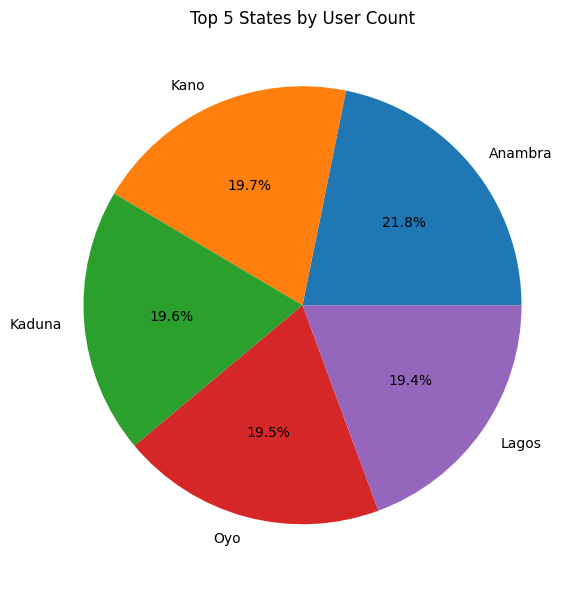

In [ ]:
# Pie chart showing the user distribution by state

top_states = dataset['state'].value_counts().head(5)
plt.figure(figsize=(6, 6))
top_states.plot.pie(autopct='%1.1f%%')
plt.title("Top 5 States by User Count")
plt.ylabel("")
plt.tight_layout()
plt.savefig("user_distribution_by_state.png")
plt.show()

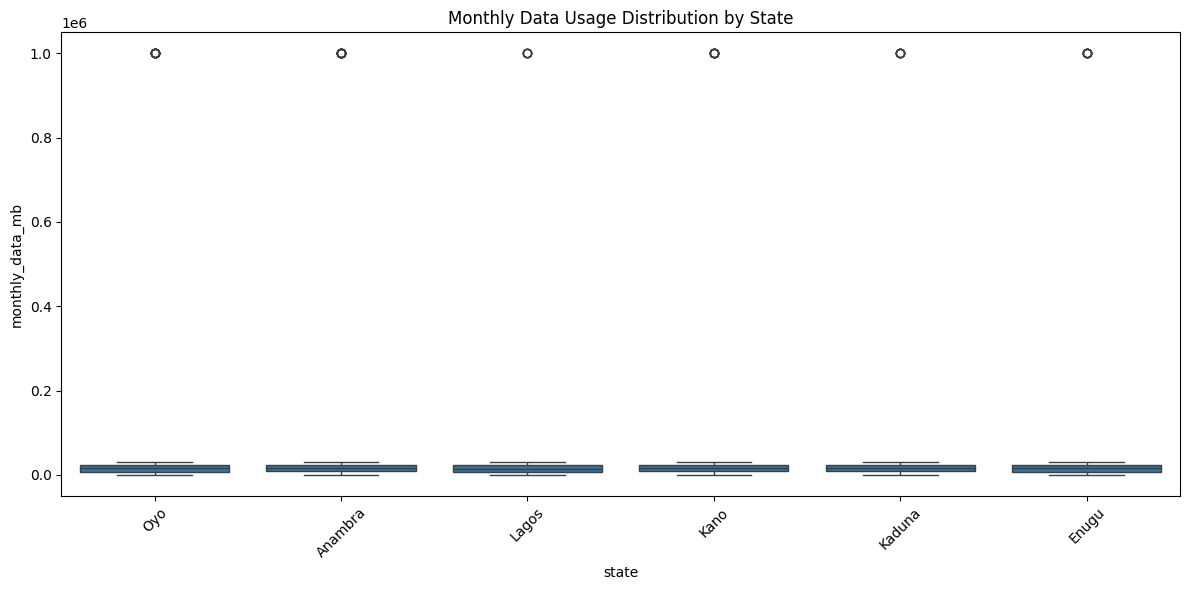

In [ ]:
# Monthly data usage by state

plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='monthly_data_mb', data=dataset)
plt.xticks(rotation=45)
plt.title("Monthly Data Usage Distribution by State")
plt.tight_layout()
plt.savefig("boxplot_data_by_state.png")
plt.show()

In [59]:
# Saving the cleaned dataset

dataset.to_excel('second_cleaned_mobile_usage_ng.xlsx', index=False)